#### Create items similarity recommendation system for movies

In [23]:
#libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [24]:
#data
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [25]:
df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [26]:
#info about the data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [28]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [29]:
#grab movie title
movie_titles = pd.read_csv('Movie_Id_Titles')

In [30]:
#Merge df with movie_titles
df = pd.merge(df, movie_titles, on='item_id')

In [31]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [33]:
#Test the water
#Average rating of every title by grouping by title
#then sort by best movie.
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

#This is using group by which means it is possible that only one or two people
#saw the movie and give it 5 star rating.

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [34]:
#movie with the most rating
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [35]:
#create a df called ratings and put all above in it
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [37]:
ratings.head()

#like mentioned, this rating depends on how many people rated it.
#if only one people rates a movie 5 star doesn't really help vs 1000 people.

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [38]:
#Add numbers of rating to above
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [39]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


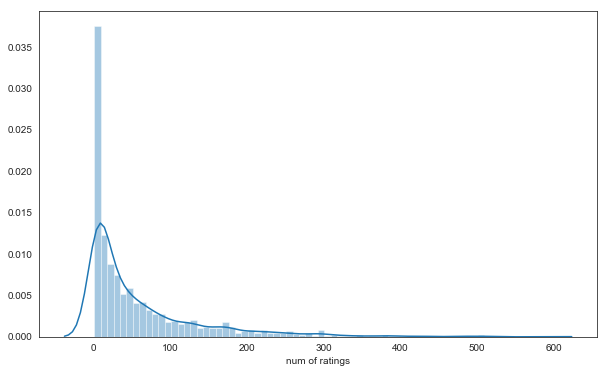

In [42]:
#EDA
plt.figure(figsize=(10,6))
sns.distplot(ratings['num of ratings'], bins=70)

In [43]:
#Most of the num of ratings are quite few. Most movies have either 0 or 1
#rating.

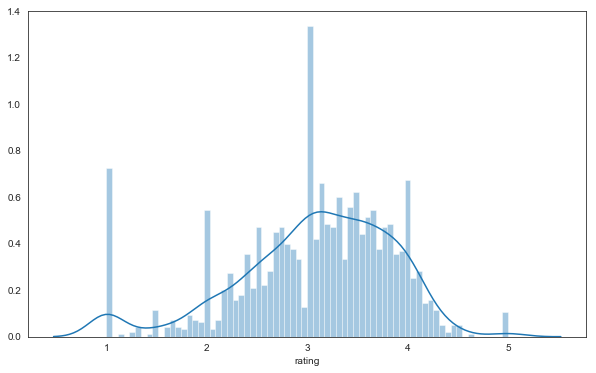

In [44]:
plt.figure(figsize=(10,6))
sns.distplot(ratings['rating'], bins=70)

In [45]:
#The peaks make sense because only have a few people watching them or 
#just one person watched them and happened to give it a whole number star.
#Most movies are distributed normally around 3- 4. 

<Figure size 720x720 with 0 Axes>

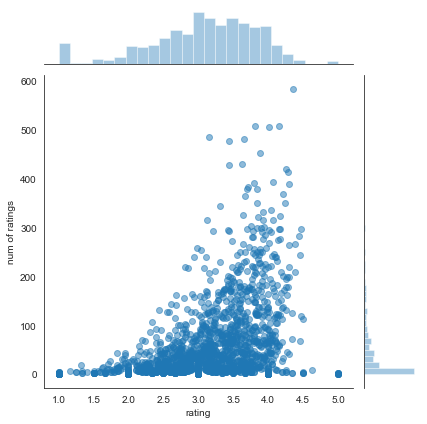

In [47]:
plt.figure(figsize=(10,10))
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

In [49]:
#It seems like when the movies have more ratings, they are more likely to
#have higher rating. When the movie is good, more people watch it 
#and more rating it gets.
#Again there is also outlier like 5.0. 

In [51]:
#Create a matrix that has the user IDs on one axis and movie title on another.
#Each cell consists the rating the user gave to that movie.
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [52]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#There are a lot of missing values because no user has watched all the movies.
#Check the most rated movie
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [59]:
#Grab the user ratings for two of the most rated movies.
#we chose a science friction movie and a comedy movie.
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

#Now we have a series with user ID and the actual rating they gave that movie
#or they didn't rate that movie.

In [60]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [62]:
#Use corrwith to get the correlations between these two pandas series
#corrwith computes the pairwise correlation between row s or columns of two 
#DataFrame objects instead of just the index or columns of a dataframe.
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

#This correlates the starwars user ratings to movies in moviemat.
#All we are doing here is for the correlation of every other movie that
#specific user behavior on the Star Wars movie. 
#As we saw in moviemat, users haven't seen some movies, so we are asking 
#the correlation of all the movies and StarWars.
#Of couse correlates to the user's rated movie vs their rating to starwars.

In [63]:
#Do it to Liar Liar too
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [64]:
#Clean NaNs
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [65]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [68]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

#some of the correlation don't make sense because these movies most likely
#happened to have been seen only one person who also happened to rate 
#StarWars 5 stars.

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [69]:
#Now what we can do is to filter the movies less than a certain num of reviews
#so we can set a threshold for the number of ratings necessary in order to be
#put into our model.

#filtering out the movie with less than 30 reviews
corr_starwars = corr_starwars.join(ratings['num of ratings'])

#we use join here instead of merge because we have title as the index of 
#the data frame.

In [71]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [76]:
corr_starwars[corr_starwars['num of ratings']>30].sort_values('Correlation',
                                                              ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Night Falls on Manhattan (1997),0.515291,32
When We Were Kings (1996),0.515164,44
Brassed Off (1996),0.515108,32
Some Folks Call It a Sling Blade (1993),0.509016,41
Giant (1956),0.488093,51


In [75]:
#Now it makes more sense, people who like starwars are likely to watch another
#starwars movie. They are most correlated to StarWars.
#We can also see other movies like comedy in it. It is here maybe because 
#they are popular movies so is StarWars.
#A lof of the times that these really popular movies or items tend to be
#recommended to other people who also like other really popular items. 

In [77]:
#let's see liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [78]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [79]:
corr_liarliar.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [80]:
corr_liarliar[corr_liarliar['num of ratings']>30].sort_values('Correlation',
                                                              ascending=False).head(10)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
"Prophecy, The (1995)",0.685905,32
Bio-Dome (1996),0.680800,31
Tie Me Up! Tie Me Down! (1990),0.668145,32
"Transformers: The Movie, The (1986)",0.593851,32
Eddie (1996),0.588235,40
Pete's Dragon (1977),0.555788,43
First Kid (1996),0.553504,40
"Adventures of Pinocchio, The (1996)",0.553115,39
